# Workshop 1.3 'Catchy title'

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Ronald Brinkgeve, Anna Störiko*

*Due: `Wednesday`, `September` `17`, `2025`.*

## Part 1 Groundwater flow: Hydraulic conductivity - Falling head test

### Solving ordinary differential equation - Initial value problem

![falling head test](https://files.mude.citg.tudelft.nl/falling_head.png)

Source: A. Verruijt, Grondmechanica / Soil Mechanics; https://geo.verruijt.net/software/GrondMechBoek.pdf

The falling head test is a test to determine the hydraulic conductivity (permeability) of a soil sample.
The soil sample is put in a box with water. A glass tube in the sample is used to measure the hydraulic head h.
Before the test, water is pored in the tube while the valve is closed.
At the start of the test, the valve is opened and the decrease of the hydraulic head is measured in time.

The hydraulic head h in this test can be defined by the following ordinary differential equation:

$$ \frac{dh}{dt} = - \frac{K A h}{a L} $$

where
*   h = hydraulic head (measured in the tube)
*   K = permeability (hydraulic conductivity)
*   A = cross section area of the sample
*   a = cross section area of the tube
*   L = sample height

In this notebook we will solve the decreasing hydraulic head ('falling head') h in time

### True solution:
The true solution can be obtained by solving the differential equation analytically:
$$h = h_0 \space exp \left( \frac{-K A t}{a L} \right) $$


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.1:}$
    
Run the cells below to define the parameters and visualise the analytical solution:

</p>
</div>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

k = 1e-6    # permeability
A = 0.1     # cross section area of the sample
a = 0.001   # cross section area of the tube
L = 0.1     # sample height
h0= 1.0     # initial groundwater head
t0= 0.0     # start time
maxtime = 5000
dt = 500
maxsteps = round(maxtime / dt)

In [ ]:
t = np.linspace(0, maxtime, 1001)
h = [h0 * math.exp(-k * A * t[i] / (a * L) ) for i in range(1001)]


In [ ]:
plt.plot(t, h, label='Analytical solution')
plt.xlabel('time [s]')
plt.ylabel('h [m]')
plt.legend()
plt.show()

### Euler Forward:



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.2:}$
    
Formulate the Euler Forward solution and complete the code below:

</p>
</div>

In [ ]:
t_ = np.linspace(0, maxtime, maxsteps+1)
h_EF = []
h_EF.append(h0)
for i in range(maxsteps):
    h_new = --- YOUR CODE HERE ---
    h_EF.append(h_new)


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
$\text{Solution 1.2:}$
</p>
Euler Forward formulation:
$$ \frac{h(t_{i+1}) - h(t_i)}{\Delta t} = - \frac{K A}{a L} h(t_i) $$

$$ h(t_{i+1}) = h(t_i) - \Delta t \frac{K A}{a L} h(t_i) = \left(1 - \Delta t \frac{K A}{a L}\right) h(t_i) $$</div>



In [ ]:
h_EF, t_ = [], []
h_EF.append(h0)
t_.append(t0)
for i in range(maxsteps):
    h_new = (1. - dt * k * A / (a * L) ) * h_EF[-1]
    h_EF.append(h_new)
    t_.append(t_[-1] + dt)

### Euler Backward:



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.3:}$
    
Formulate the Euler Backward solution and complete the code below:

</p>
</div>

In [ ]:
h_EB = []
h_EB.append(h0)
for i in range(maxsteps):
    h_new = --- YOUR CODE HERE ---
    h_EB.append(h_new)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
$\text{Solution 1.3:}$
</p>
Euler Backward formulation:
$$ \frac{h(t_{i+1}) - h(t_i)}{\Delta t} = - \frac{K A}{a L} h(t_{i+1}) $$

$$ h(t_{i+1}) \left(1 + \Delta t \frac{K A}{a L} \right) = h(t_i) $$

$$ h(t_{i+1}) = h(t_i) / \left(1 + \Delta t \frac{K A}{a L} \right) $$</div>



In [ ]:
h_EB = []
h_EB.append(h0)
for i in range(maxsteps):
    h_new = h_EB[-1] / (1. + dt * k * A / (a * L) )
    h_EB.append(h_new)

### Heun's method (= 2-stage Runge-Kutta):



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.4:}$
    
Formulate Heun's solution and complete the code below:

</p>
</div>

In [ ]:
h_RK2 = []
h_RK2.append(h0)
for i in range(maxsteps):
    fac = -k*A / (a*L)
    k1 =  --- YOUR CODE HERE ---
    k2 =  --- YOUR CODE HERE ---
    h_new =  --- YOUR CODE HERE ---
    h_RK2.append(h_new)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
$\text{Solution 1.4:}$
</p>
Heun's method:
$$ h(t_{i+1}) = h(t_i) + \frac{\Delta t}{2} \left(k_1 + k_2 \right) $$

$$ k_1 = \frac{d h}{dt} |_{t=t_i} = - \frac{K A}{a L} h(t_i) $$

$$ k_2 = \frac{d h}{dt} |_{t=t_{i+1*}} \space with \space h(t_{i+1*}) = h(t_i) - \Delta t \frac{K A}{a L} h(t_i) $$

$$ Hence: \space k_2 = - \frac{k A}{a L} \left(h(t_i) - \Delta t \frac{K A}{a L} h(t_i) \right) = - \frac{K A}{a L} \left(h(t_i) + \Delta t k_1 \right) $$
</div>



In [ ]:
h_RK2 = []
h_RK2.append(h0)
for i in range(maxsteps):
    fac = -k*A / (a*L)
    k1 = fac * h_RK2[-1]
    k2 = fac * (h_RK2[-1] + dt * k1)
    h_new = h_RK2[-1] + dt/2 * (k1 + k2)
    h_RK2.append(h_new)

### 4-stage Runge-Kutta:



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.5:}$
    
Formulate the 4-stage Runge-Kutta solution and complete the code below:

</p>
</div>

In [ ]:
h_RK4 = []
h_RK4.append(h0)
for i in range(maxsteps):
    fac = -k*A / (a*L)
    k1 =  --- YOUR CODE HERE ---
    k2 =  --- YOUR CODE HERE ---
    k3 =  --- YOUR CODE HERE ---
    k4 =  --- YOUR CODE HERE ---
    h_new =  --- YOUR CODE HERE ---
    h_RK4.append(h_new)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
$\text{Solution 1.5:}$
</p>
Runge-Kutta's method:
$$ h(t_{i+1}) = h(t_i) + \frac{\Delta t}{6} \left(k_1 + 2 k_2 + 2 k_3 + k_4 \right) $$

$$ k_1 = \frac{d h}{dt} |_{t=t_i} = - \frac{k A}{a L} h(t_i) $$

$$ k_2 = \frac{d h}{dt} |_{t=t_{i+1/2*}} \space with \space h(t_{i+1/2*}) = h(t_i) - \frac{\Delta t}{2} \frac{k A}{a L} h(t_i) = h(t_i) + \frac{\Delta t}{2} k_1 $$

$$ k_3 = \frac{d h}{dt} |_{t=t_{i+1/2}} \space with \space h(t_{i+1/2}) = h(t_i) - \frac{\Delta t}{2} \frac{k A}{a L} h(t_{i+1/2*}) = h(t_i) + \frac{\Delta t}{2} k_2 $$

$$ k_4 = \frac{d h}{dt} |_{t=t_{i+1*}} \space with \space h(t_{i+1*}) = h(t_i) - \Delta t \frac{k A}{a L} h(t_{i+1/2}) = h(t_i) + \Delta t k_3$$</div>



In [ ]:
h_RK4 = []
h_RK4.append(h0)
for i in range(maxsteps):
    fac = -k*A / (a*L)
    k1 = fac * h_RK4[-1]
    k2 = fac * (h_RK4[-1] + dt/2 * k1)
    k3 = fac * (h_RK4[-1] + dt/2 * k2)
    k4 = fac * (h_RK4[-1] + dt * k3) 
    h_new = h_RK4[-1] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    h_RK4.append(h_new)

### Plot results

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.6:}$
    
Run the code cell below to show the different solutions:

</p>
</div>

In [ ]:
plt.plot(t, h, label='True solution')
plt.plot(t_,h_EF,label='Explicit Euler (dt='+str(dt)+')', marker='.')
plt.plot(t_,h_EB,label='Implicit Euler (dt='+str(dt)+')', marker='.')
plt.plot(t_,h_RK2,label='Heun\'s method(dt='+str(dt)+')', marker='.')
plt.plot(t_,h_RK4,label='Runge-Kutta   (dt='+str(dt)+')', marker='.')
plt.xlabel('time [s]')
plt.ylabel('h [m]')
plt.legend()
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.7:}$
    
Comment on the various results in view of the true solution and their numerical stability.

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
$\text{Solution 1.7:}$
</p>
Euler Forward solution is unstable for dt > 1000 and predicts h to decrease too quickly
</p>
Euler Backward solution is unconditionally stable but predicts h to decrease too slowly
</p>
Heun's solution is stable and more accurate than the Euler solutions; still, h decreases a bit too slowly
</p>
Runge-Kutta's solution is stable and much more accurate than the other solutions



## Part 2: Boundary value problem: Euler-Bernoulli bending beam

![bending beam](https://files.mude.citg.tudelft.nl/bending_beam.png)

The bending deflection of a beam, subject to a distributed load q, and the corresponding bending moment distribution, is a boundary value problem that can be described by two second-order differential equations according to Euler-Bernoulli:

Bending moments M:

$$ \frac{d^2 M}{dx^2} = -q $$

Beam deflection w:

$$ M = - EI \frac{d^2 w}{dx^2} $$

where
*   M = bending moment
*   w = beam deflection
*   q = distributed load
*   EI = flexural rigidity (bending stiffness)
*   x = longitudinal direction

The boundary conditions for this problem depends on how the beam is supported at the left and right ends. In this case, we consider a simply supported beam where the displacement and the bending moment are zero at both ends of the beam.

### Numerical solution

First, we will implement a numerical solution solving the two differential equations sequentially (one after the other), by using a central difference scheme for both equations.

### Central Difference scheme for both equations

$$ \frac{M_{i-1} - 2 M_i + M{i+1}}{\Delta x^2} = -q_i \space or \space M_{i-1} - 2 M_i + M_{i+1} = - \Delta x^2 q_i $$

$$ - \frac{M_i}{EI} = \frac{w_{i-1} - 2 w_i + w_{i+1}}{\Delta x^2} \space or \space w_{i-1} - 2 w_i + w_{i+1} = -\frac{\Delta x^2}{EI} M_i \space or \space \frac{\Delta x^2}{EI} M_i + w_{i-1} - 2 w_i + w_{i+1} = 0 $$

![simply supported beam](https://files.mude.citg.tudelft.nl/simply_supported.png)


The above equations from the central difference scheme can be assembled in a matrix-vector system.

$$
\left[
\begin{matrix}
1 & 0 & 0 & 0 & {} & {} & {} & {} \\
1 & -2 & 1 & 0 & {} & {} & {} & {} \\
0 & 1 & -2 & 1 & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & 1 & -2 & 1 & 0 \\
{} & {} & {} & {} & 0 & 1 & -2 & 1 \\
{} & {} & {} & {} & 0 & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
M_0 \\
M_1 \\
M_2 \\
\vdots \\
M_{n-2} \\
M_{n-1} \\
M_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
M_{x=0} \\
- x^2 q \\
- x^2 q \\
\vdots \\
- x^2 q \\
- x^2 q \\
M_{x=L} \\
\end{matrix}
\right]
$$

and

$$
\left[
\begin{matrix}
1 & 0 & 0 & 0 & {} & {} & {} & {} \\
1 & -2 & 1 & 0 & {} & {} & {} & {} \\
0 & 1 & -2 & 1 & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & 1 & -2 & 1 & 0 \\
{} & {} & {} & {} & 0 & 1 & -2 & 1 \\
{} & {} & {} & {} & 0 & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_{n-2} \\
w_{n-1} \\
w_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
w_{x=0} \\
-\cfrac{\Delta x^2 M_1}{EI} \\
-\cfrac{\Delta x^2 M_2}{EI} \\
\vdots \\
-\cfrac{\Delta x^2 M_{n-2}}{EI} \\
-\cfrac{\Delta x^2 M_{n-1}}{EI} \\
w_{x=L} \\
\end{matrix}
\right]
$$


where $n$ is the number of grid points. Since the bending moments $M$ can be solved independendly from the beam deflection $w$, we can solve the first matrix-vector system first, and use the solution (i.c. $M$) to solve the second matrix-vector system, which depends on $M$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Beam properties
EI = 1e6
L  = 10.
q  = -10.

# Boundary conditions (Dirichlet)
w0 = 0.0
wL = 0.0
M0 = 0.0
ML = 0.0

# Discretisation
dx = 0.1
maxgrid = round(L / dx)

Solving bending moments M:

In [ ]:
# Initialisation of (sub-)matrix and vector
A11 = np.zeros([maxgrid+1, maxgrid+1])
b1  = np.zeros(maxgrid+1)
x   = np.zeros(maxgrid+1)

# filling the matrix and vector components for the first system
for i in range(maxgrid+1):
    if i == 0:
        A11[i,i] = 1.
        b1[i]    = M0
    elif i == maxgrid:
        A11[i,i] = 1.
        b1[i]    = ML
    else:
        A11[i,i-1] = 1.
        A11[i,i]   = -2.
        A11[i,i+1] = 1.
        b1[i]      = -dx*dx*q
    x[i] = i*dx

# solve the system of equations
M = np.linalg.solve(A11,b1)

Solving beam deflection w:

In [ ]:
# Initialisation of (sub-)matrix and vector
A22 = np.zeros([maxgrid+1, maxgrid+1])
b2  = np.zeros(maxgrid+1)

# filling the matrix and vector components for the second system
for i in range(maxgrid+1):
    if i == 0:
        A22[i,i] = 1.
        b2[i]    = w0
    elif i == maxgrid:
        A22[i,i] = 1.
        b2[i]    = wL
    else:
        A22[i,i-1] = 1.
        A22[i,i]   = -2.
        A22[i,i+1] = 1.
        b2[i]      = -dx*dx*M[i]/EI             # note that M is based the solution from the first system

# solve the system of equations
w = np.linalg.solve(A22,b2)

Plotting the results

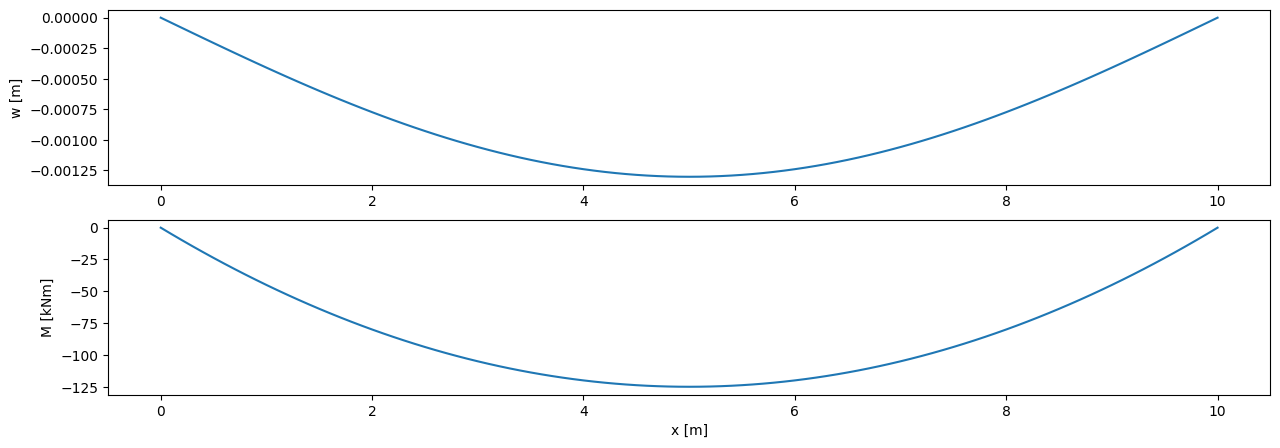

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,5))

ax[0].plot(x,w)
# ax[0].set_xlabel('x [m]')
ax[0].set_ylabel('w [m]')

ax[1].plot(x,M)
ax[1].set_xlabel('x [m]')
ax[1].set_ylabel('M [kNm]')

plt.show()

Compare these solutions with the so-called Myosotis rules ('Forget-me-nots' or 'Vergeet-me-nietjes') for the maximum moment and maximum deflection of a simply supported bending beam:
$$ w = \frac{5}{384} \frac{q l^4}{EI}$$
and
$$ M = \frac{1}{8} q l^2$$

### Solving both equations simultaneously

Instead of solving the differential equations sequentially, we can also solve them simultaneously by setting up one 'big' system of equations involving both bending moments and beam deflection. In that, we can make use of the sub-matrices as calculated before. However, the right-hand side vector of the second part (i.c. the term dx^2 M / EI) is now integrated in the lower left-hand block of the matrix as dx^2/EI, while M is in the vector with unknowns.
$$
\left[
\begin{matrix}
1 & 0 & 0 & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
1 & -2 & 1 & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & 1 & -2 & 1 & {} & {} & {} & {} & {} & {} \\
{} & {} & {} & 0 & 0 & 1 & {} & {} & {} & {} & {} & {} \\
0 & {} & {} & {} & {} & {} & 1 & 0 & 0 & {} & {} & {} \\
{} & \cfrac{\Delta x^2}{EI} & {} & {} & {} & {} & 1 & -2 & 1 & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & \cfrac{\Delta x^2}{EI} & {} & {} & {} & {} & 1 & -2 & 1 \\
{} & {} & {} & {} & {} & 0 & {} & {} & {} & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
M_0 \\
M_1 \\
\vdots \\
M_{n-1} \\
M_n \\
w_0 \\
w_1 \\
\vdots \\
w_{n-1} \\
w_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
M_{x=0} \\
- \Delta x^2 q \\
\vdots \\
- \Delta x^2 q \\
M_{x=L} \\
w_{x=0} \\
0 \\
\vdots \\
0 \\
w_{x=L} \\
\end{matrix}
\right]
$$

Note that the upper right-hand block remains zero, so the matrix is not symmetric! In fact, the two matrices above are also not fully symmetric.

In [ ]:
A11 = np.zeros([maxgrid+1, maxgrid+1])
A12 = np.zeros([maxgrid+1, maxgrid+1])
A21 = np.zeros([maxgrid+1, maxgrid+1])
A22 = np.zeros([maxgrid+1, maxgrid+1])
b1  = np.zeros(maxgrid+1)
b2  = np.zeros(maxgrid+1)

# filling the matrix and vector components for the entire system
# the matrix is supposed to be subdivided in blocks, which will be built together at the end
for i in range(maxgrid+1):
    if i == 0:
        A11[i,i] = 1.
        A21[i,i] = 0.
        A22[i,i] = 1.
        b1[i]    = M0
        b2[i]    = w0
    elif i == maxgrid:
        A11[i,i] = 1.
        A21[i,i] = 0.
        A22[i,i] = 1.
        b1[i]    = ML
        b2[i]    = wL
    else:
        A11[i,i-1] = 1.
        A11[i,i]   = -2.
        A11[i,i+1] = 1.
        A21[i,i]   = dx*dx/EI
        A22[i,i-1] = 1.
        A22[i,i]   = -2.
        A22[i,i+1] = 1.
        b1[i]      = -dx*dx*q

A = np.block([[A11,A12],
              [A21,A22]])
b = np.concatenate([b1, b2])

Solving the system of equations

In [ ]:
u = np.linalg.solve(A,b)

M = u[:maxgrid+1]                   # Extracting moments from the solution
w = u[maxgrid+1:]                   # Extracting deflections from the solution

Plotting the results

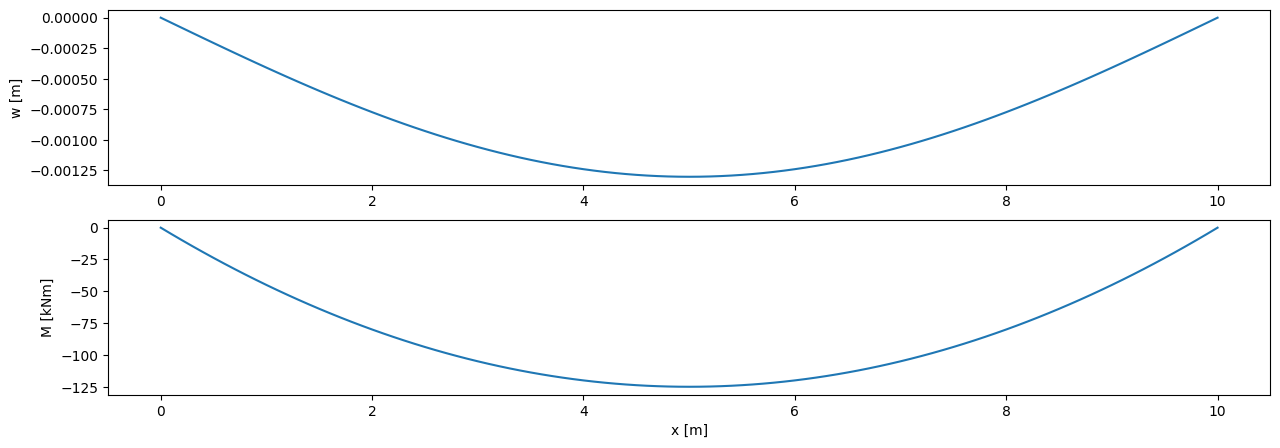

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,5))

ax[0].plot(x,w)
# ax[0].set_xlabel('x [m]')
ax[0].set_ylabel('w [m]')

ax[1].plot(x,M)
ax[1].set_xlabel('x [m]')
ax[1].set_ylabel('M [kNm]')

plt.show()

Which method do you prefer? Solving the equations sequentially or simultaneously?

Does it make a difference for the accuracy of the results?

# TEMPLATE BELOW

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task x.x:}$
    
Run the cell below to load two dictionaries (objects) into the Python variable space, <code>m1</code> and <code>m2</code>. Some random math: $E = m \cdot c^2$. And

$$F = m \cdot a$$

You can run the code to check the key:value pairs.
    
</p>
</div>

In [ ]:
# Provided code which is not to be edited by students
import numpy as np

In [ ]:
# The code given to students can be indicated with:
# with a cell tag `assignment`.
# These cells will be removed from the solution notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `assignment`.
# Places where student should write their code are marked with `### YOUR CODE HERE ###` for filling in a single line
# or with `### YOUR CODE LINES HERE` for filling in multiple lines

import numpy as np

a = [### YOUR CODE HERE ###]
    
### YOUR CODE LINES HERE

print('First 20 fibonacci numbers:', ### YOUR CODE HERE ###)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution x.x:}$

Having trouble understanding how the Gauss-Newton scheme works? Do you want to visualize how the parameters and model change on each iteration? Try uncommenting the cell below to create an interactive plot!

It is set up to visualize the model on each iteration. You can gain insight into the way convergence occurs by changing the value of <code>initial_guess_alternative</code> and rerunning the cell.
</p></div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

In [ ]:
# Solution code (in a separate cell) is indicated with
# a cell tag 'solution'.
# These cells will be removed from the assignment notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `solution`.

a = [0,2]

for i in range(2, 20):
    a.append(a[i-1] + a[i-2])

print('First 20 fibonacci numbers:', a)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Don't use the CSS danger/warning blocks because they don't display when converting to HTML with pandoc (won't display right on course files on website).
</p></div>

## Part `2, ...`

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>